In [ ]:
import xarray as xr
import numpy as np

# load the trajectory dataset "trajectory.nc" from disk into the xarray.Dataset
#dataset  = xr.load_dataset("/home/villarreal/Documents/STO_MD/merged_trajectories/trajectory_3.nc")
dataset=xr.load_dataset('nvt.1200/md_4/trajectory.nc')
#dataset=xr.load_dataset('/home/villarreal/Documents/STO_MD/merged_trajectories/trajectory_3.nc')

In [ ]:
dataset

In [ ]:
print("Avg Temp",np.average(dataset.temperature.values))

In [ ]:
from ase.io import read
import numpy as np

# load atoms from xyz file. Here, we only parse the first 10 molecules

#atoms = read('/home/villarreal/Documents/STO_MD/merged_trajectories/trajectory.db',index=':')
atoms=read('nvt.300/tutorial_data/trajectory.db',index=':')




# parse properties as list of dictionaries
property_list = []
E=[]
F=[]
R=[]
z=[]
for at in atoms:
    # All properties need to be stored as numpy arrays.
    # Note: The shape for scalars should be (1,), not ()
    # Note: GPUs work best with float32 data
    #energy = np.array([float(list(at.info.keys())[0])], dtype=np.float32)
    E.append([at.get_potential_energy()])
    F.append(at.get_forces())
    R.append(at.get_positions())
    z.append(at.numbers)
    #property_list.append(
    #    {'E': at.get_potential_energy(), 'F': at.get_forces(),'R':at.get_positions,'z':at.numbers}
        
    #)
    #property_list.append({'forces': at.get_positions()}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(E)


# Create Train and Test data

In [3]:
from ase.io import read
import numpy as np
import os
###OCT 18 this directory for 1500
#path_data='/home/villarreal/Documents/STO_MD/ModelsAndData/OCT18/nvt.1500.RS.OCT10.2021_WITHPBC'
#path_dirs='/home/villarreal/Documents/STO_MD/ModelsAndData/OCT18/nvt.1500.RS.OCT10.2021_WITHPBC'

###OCT18 this directory for 300
path_data="/home/villarreal/Documents/STO_MD/ModelsAndData/OCT18/nvt.300.OCT18"
path_dirs="/home/villarreal/Documents/STO_MD/ModelsAndData/OCT18/nvt.300.OCT18"


atoms = read(path_data+'/trajectory.db',index=':')

os.system('rm -rf ' + path_dirs+ '/randomized')
os.system('rm -rf ' + path_dirs+ '/sequential')

os.system('mkdir ' + path_dirs+ '/randomized')
os.system('mkdir ' + path_dirs+ '/sequential')





# parse properties as list of dictionaries
property_list = []
E=[]
F=[]
R=[]
z=[]
CELL=[]
PBC=[]
for at in atoms:
    # All properties need to be stored as numpy arrays.
    # Note: The shape for scalars should be (1,), not ()
    # Note: GPUs work best with float32 data
    #energy = np.array([float(list(at.info.keys())[0])], dtype=np.float32)
    E.append([at.get_potential_energy()])
    F.append(at.get_forces())
    R.append(at.get_positions())
    z.append(at.numbers)
    CELL.append(at.get_cell())
    PBC.append(at.get_pbc())
    #property_list.append(
    #    {'E': at.get_potential_energy(), 'F': at.get_forces(),'R':at.get_positions,'z':at.numbers}
        
    #)
    #property_list.append({'forces': at.get_positions()}


# Run this if you want to merge datasets

In [ ]:
path_data='nve.3'
atoms = read(path_data+'/trajectory.db',index=':')





for at in atoms:
    # All properties need to be stored as numpy arrays.
    # Note: The shape for scalars should be (1,), not ()
    # Note: GPUs work best with float32 data
    #energy = np.array([float(list(at.info.keys())[0])], dtype=np.float32)
    E.append([at.get_potential_energy()])
    F.append(at.get_forces())
    R.append(at.get_positions())
    z.append(at.numbers)
    #property_list.append(
    #    {'E': at.get_potential_energy(), 'F': at.get_forces(),'R':at.get_positions,'z':at.numbers}
        
    #)
    #property_list.append({'forces': at.get_positions()}

# Randomized dataset

In [4]:
#Randomized
E=np.array(E)
F=np.array(F)
R=np.array(R)
z=np.array(z)
CELL=np.array(CELL)
PBC=np.array(PBC)
randomly_permuted_idx=np.random.permutation(np.arange(len(E)))
size_test=20
#randomly_permuted_idx=np.arange(len(atoms))
idxsTrain=randomly_permuted_idx[:-size_test]
idxsTrain=idxsTrain.astype(int)
idxsTest=randomly_permuted_idx[-size_test:]
idxsTest=idxsTest.astype(int)
len(idxsTest)+len(idxsTrain)

6108

In [5]:
np.savez(path_dirs+'/randomized/trajectory',E=E[idxsTrain],F=F[idxsTrain],R=R[idxsTrain],z=z[0],CELL=\
        CELL[0],PBC=PBC[0])
np.savez(path_dirs+'/randomized/trajectoryTest',E=E[idxsTest],F=F[idxsTest],R=R[idxsTest],z=z[0],CELL=\
        CELL[0],PBC=PBC[0])
print("Train",np.shape(idxsTrain))
print("Test",np.shape(idxsTest))

Train (6088,)
Test (20,)


# Sequential dataset

In [ ]:
#Sequential datasets
E=np.array(E)
F=np.array(F)
R=np.array(R)
z=np.array(z)
size_test=9000
randomly_permuted_idx=np.arange(len(E))
idxsTrain=randomly_permuted_idx[:-size_test]
idxsTrain.astype(int)
idxsTest=randomly_permuted_idx[-size_test:]
print(len(idxsTest))
print(len(idxsTrain))
len(idxsTest)+len(idxsTrain)

In [ ]:
np.savez(path_dirs+'/sequential/trajectory',E=E[idxsTrain],F=F[idxsTrain],R=R[idxsTrain],z=z[0])
np.savez(path_dirs+'/sequential/trajectoryTest',E=E[idxsTest],F=F[idxsTest],R=R[idxsTest],z=z[0])
print("Train",np.shape(idxsTrain))
print("Test",np.shape(idxsTest))

# MH MonteCarlo dataset

In [ ]:
def p(E,T):
    kBT=1.38e-23*T
    return np.exp(-E/kBT)



E=np.array(E)
F=np.array(F)
R=np.array(R)
z=np.array(z)

idxs=[]

for i in np.random.randint(low=0,high=range(len(E)),size=range(len(E))):
    idx_current=0
    Q=np.min(1,p(E[i])/p(E[idx_current]))
    A=np.random.uniform(0,1)
    if A<Q:
        idx_current=i
        idxs.append(idx_current)
    else:
        idxs.append(idx_current)
print(idxs)

In [ ]:
np.savez(path_dirs+'/MHtrajectory',E=E[idxsTrain],F=F[idxsTrain],R=R[idxsTrain],z=z[0])
np.savez(path_dirs+'/MHtrajectoryTest',E=E[idxsTest],F=F[idxsTest],R=R[idxsTest],z=z[0])
print("Train",np.shape(idxsTrain))
print("Test",np.shape(idxsTest))

# Resample to uniform dist in E

Total Dataset size 6108
Train (6088,)
Test (20,)


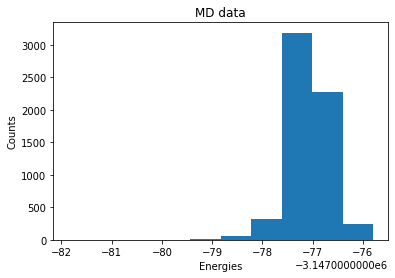

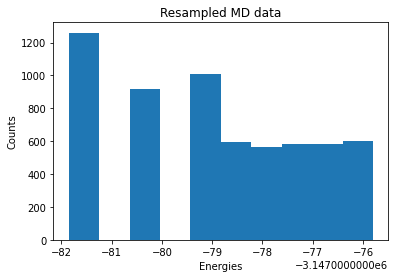

In [10]:
import matplotlib.pyplot as plt

def find_idxs(samples,E):
    idxs=[]
    for i in range(len(samples)):
        idx=np.where(E.flatten()==samples[i])
        idxs.append(idx)
    idxs = np.concatenate(idxs).ravel().tolist()
    return idxs

E=np.array(E)
F=np.array(F)
R=np.array(R)
z=np.array(z)
CELL=np.array(CELL)
PBC=np.array(PBC)


plt.figure()
plt.hist(E.flatten())
plt.xlabel('Energies')
plt.ylabel('Counts')
plt.title('MD data')


x = np.sort(E.flatten())
f_x = np.gradient(x)*1/(np.max(x)-np.min(x))
sample_probs = f_x/np.sum(f_x)
samples = np.random.choice(x, p=sample_probs, size=1*len(E))

idxs=find_idxs(samples,E.flatten())
#print(E[idxs])

E=E[idxs]
F=F[idxs]
R=R[idxs]
z=z[idxs]
CELL=CELL[idxs]

plt.figure()
plt.hist(E)
plt.xlabel('Energies')
plt.ylabel('Counts')
plt.title('Resampled MD data')


randomly_permuted_idx=np.random.permutation(np.arange(len(E)))
size_test=20
#randomly_permuted_idx=np.arange(len(atoms))
idxsTrain=randomly_permuted_idx[:-size_test]
idxsTrain=idxsTrain.astype(int)
idxsTest=randomly_permuted_idx[-size_test:]
idxsTest=idxsTest.astype(int)

print("Total Dataset size",len(idxsTest)+len(idxsTrain))
np.savez(path_dirs+'/RStrajectory',E=E[idxsTrain],F=F[idxsTrain],R=R[idxsTrain],z=z[0],CELL=\
        CELL[0],PBC=PBC[0])
np.savez(path_dirs+'/RStrajectoryTest',E=E[idxsTest],F=F[idxsTest],R=R[idxsTest],z=z[0],CELL=\
        CELL[0],PBC=PBC[0])
print("Train",np.shape(idxsTrain))
print("Test",np.shape(idxsTest))

In [14]:
data=np.load(path_dirs+'/RStrajectory.npz')
data['PBC']

array([ True,  True,  True])

In [ ]:
np.savez(path_dirs+'/RStrajectory',E=E[idxsTrain],F=F[idxsTrain],R=R[idxsTrain],z=z[0])
np.savez(path_dirs+'/RStrajectoryTest',E=E[idxsTest],F=F[idxsTest],R=R[idxsTest],z=z[0])
print("Train",np.shape(idxsTrain))
print("Test",np.shape(idxsTest))

In [ ]:
import numpy as np
A=np.array([1, 29, 30, 31, 35])
gradA=np.gradient(A)
print(A)
print(gradA)

In [ ]:
np.savez(path_dirs+'/MHtrajectory',E=E[idxsTrain],F=F[idxsTrain],R=R[idxsTrain],z=z[0])
np.savez(path_dirs+'/MHtrajectoryTest',E=E[idxsTest],F=F[idxsTest],R=R[idxsTest],z=z[0])
print("Train",np.shape(idxsTrain))
print("Test",np.shape(idxsTest))